<a href="https://colab.research.google.com/github/saadkamal219/Artificial_Intilligence/blob/main/Outlier_Handling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

filepath = '/content/drive/MyDrive/Machine Learning Dataset/placement.csv'

dataframe = pd.read_csv(filepath)

dataframe.sample(5)

,cgpa,placement_exam_marks,placed
66,6.67,31.0,1
266,7.73,50.0,1
259,7.16,10.0,0
756,7.41,30.0,1
439,6.67,10.0,1


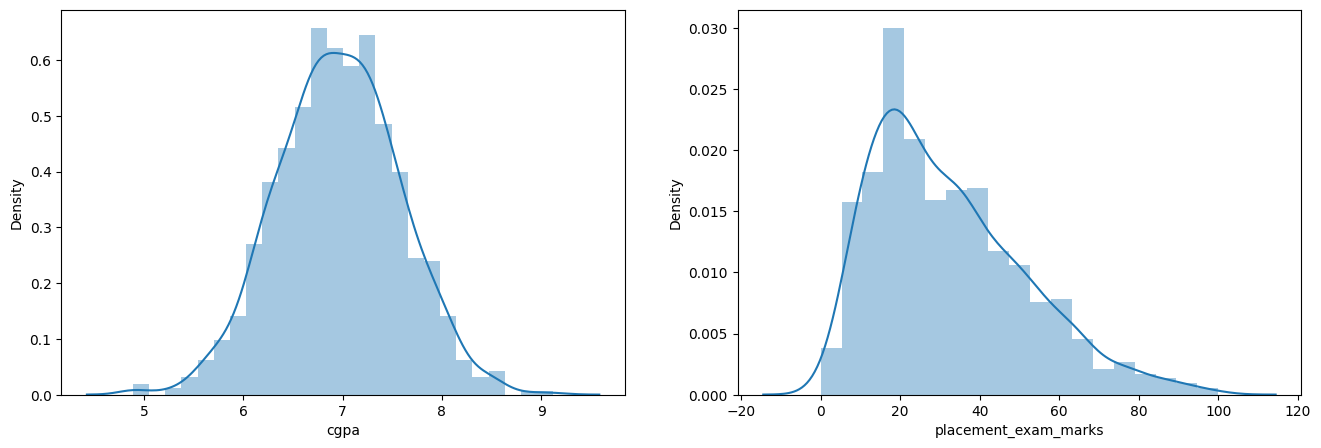

In [6]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(dataframe['cgpa'])

plt.subplot(1,2,2)
sns.distplot(dataframe['placement_exam_marks'])

plt.show()

**Outlier in Normal Distridution**

In [7]:
dataframe['cgpa'].skew()

-0.014529938929314918

#**Trimming**

In [ ]:
#upper limit = mean + 3*std
#lower limit = mean - 3*std

In [9]:
upper_limit = dataframe['cgpa'].mean() + 3*dataframe['cgpa'].std()
lower_limit = dataframe['cgpa'].mean() - 3*dataframe['cgpa'].std()

In [11]:
outlier_trimming = dataframe[(dataframe['cgpa'] > upper_limit) | (dataframe['cgpa'] < lower_limit)]
outlier_trimming

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [15]:
#removing outlier

trimmed_dataframe = dataframe[(dataframe['cgpa'] < upper_limit ) & (dataframe['cgpa'] > lower_limit)]
trimmed_dataframe.shape

(995, 3)

<Axes: >

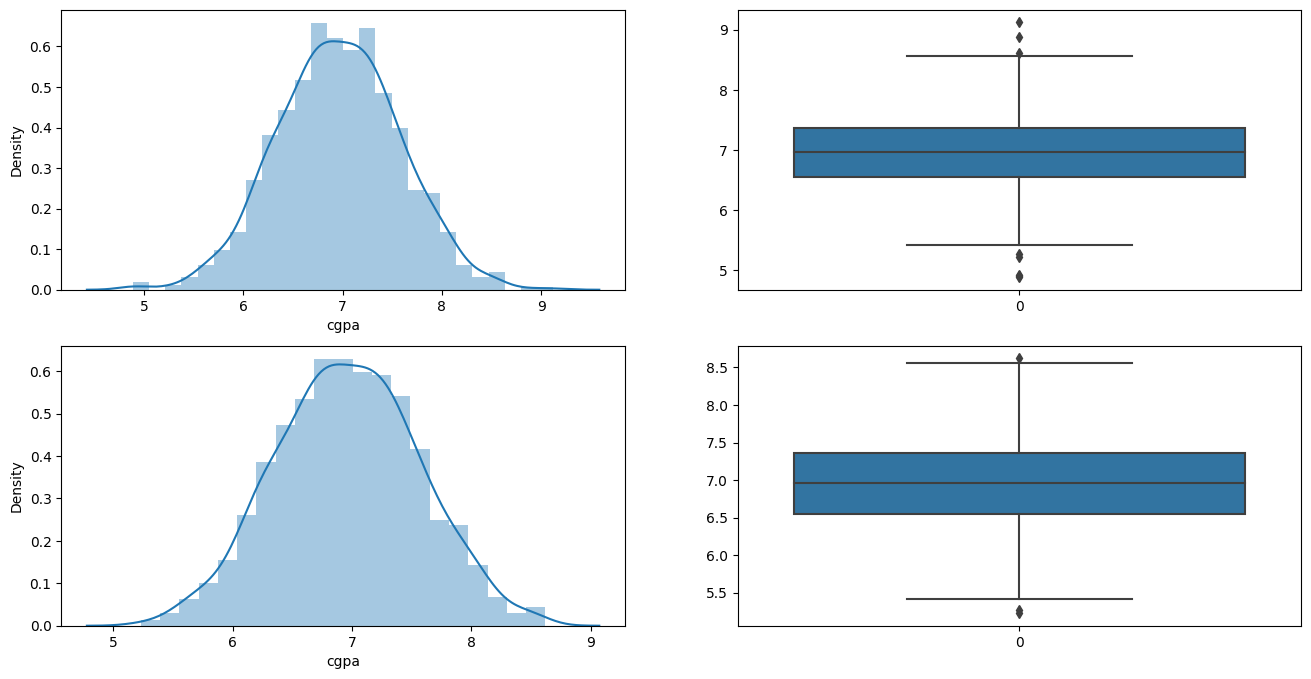

In [16]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(dataframe['cgpa'])

plt.subplot(2,2,2)
sns.boxplot(dataframe['cgpa'])

plt.subplot(2,2,3)
sns.distplot(trimmed_dataframe['cgpa'])

plt.subplot(2,2,4)
sns.boxplot(trimmed_dataframe['cgpa'])

#**Capping**

In [17]:
#np.where(condition, true, false)
capped_dataframe=dataframe.copy()
capped_dataframe['cgpa'] = np.where(
    capped_dataframe['cgpa']>upper_limit,
    upper_limit,
    np.where(
        capped_dataframe['cgpa']<lower_limit,
        lower_limit,
        capped_dataframe['cgpa']
    )
)

<Axes: >

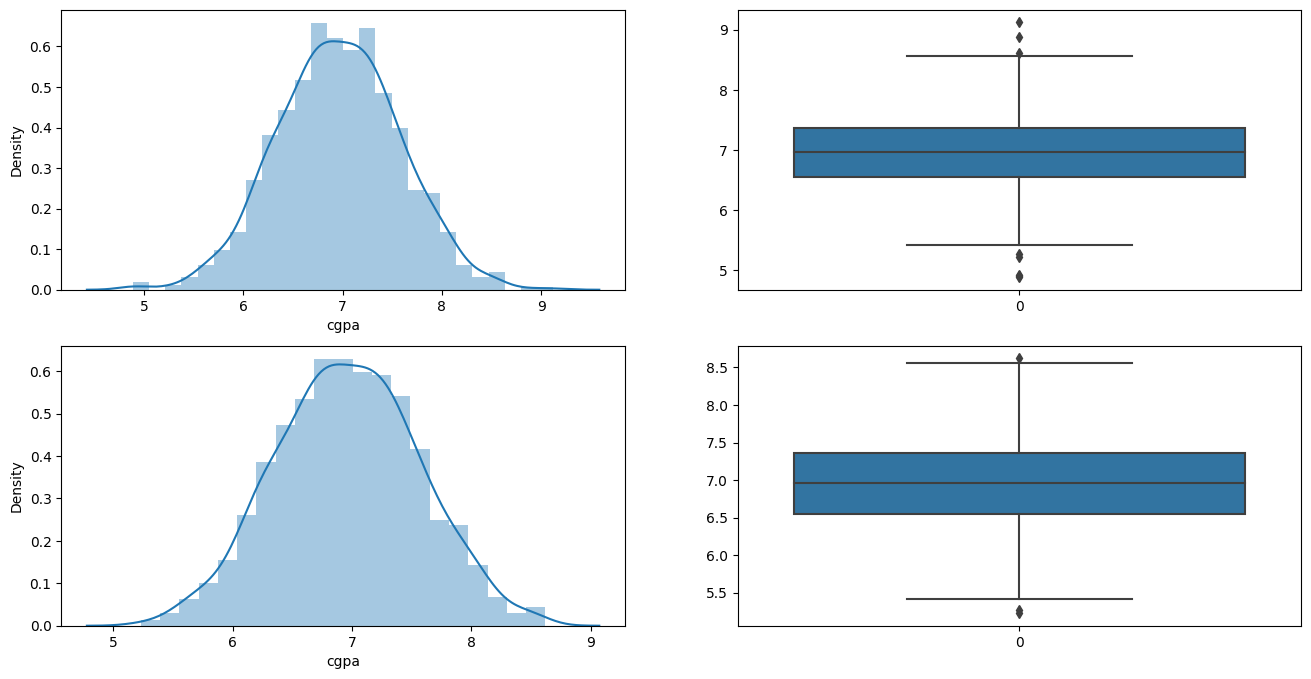

In [18]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(dataframe['cgpa'])

plt.subplot(2,2,2)
sns.boxplot(dataframe['cgpa'])

plt.subplot(2,2,3)
sns.distplot(trimmed_dataframe['cgpa'])

plt.subplot(2,2,4)
sns.boxplot(trimmed_dataframe['cgpa'])